In [1]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [20]:
monthly  = pd.read_excel("faridpur_monthly_temp.xls")

In [21]:
monthly

,MONTH,STATIONID,YEAR,MAXOFMAXTEMP_UPDATED,MINOFMAXTEMP_UPDATED,MAXOFMINTEMP_UPDATED,MINOFMINTEMP_UPDATED,AVGOFMAXTEMP_UPDATED,AVGOFMINTEMP_UPDATED
0,1,11505,2002.5,28.203333,18.603333,16.646667,8.353333,24.330333,12.078333
1,2,11505,2002.5,32.030000,23.383333,20.550000,10.820000,28.223667,15.348333
2,3,11505,2002.5,36.460000,27.493333,24.686667,14.890000,32.565667,19.838333
3,4,11505,2002.5,38.280000,28.530000,26.636667,18.896667,34.578333,23.605000
4,5,11505,2002.5,37.573333,27.856667,28.023333,20.506667,33.914333,24.697333
5,6,11505,2002.5,35.883333,28.143333,28.083333,22.696667,32.773333,25.859667
6,7,11505,2002.5,34.333333,28.030000,27.650000,24.170000,31.839333,26.072667
7,8,11505,2002.5,34.546667,28.473333,27.940000,24.003333,32.009333,26.250667
8,9,11505,2002.5,35.053333,28.233333,27.766667,23.413333,32.209667,25.934667
9,10,11505,2002.5,34.630000,26.623333,26.710000,20.486667,31.797667,24.040000


In [22]:
monthly.drop(monthly.columns[monthly.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [23]:
new_monthly = monthly.loc[:,["MONTH","MAXOFMAXTEMP_UPDATED","MINOFMINTEMP_UPDATED"]]

In [29]:
import calendar

new_monthly['MONTH'] = new_monthly['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [30]:
new_monthly

,MONTH,Maximum,Minimum
0,Jan,28.203333,8.353333
1,Feb,32.030000,10.820000
2,Mar,36.460000,14.890000
3,Apr,38.280000,18.896667
4,May,37.573333,20.506667
5,Jun,35.883333,22.696667
6,Jul,34.333333,24.170000
7,Aug,34.546667,24.003333
8,Sep,35.053333,23.413333
9,Oct,34.630000,20.486667


In [31]:
new_monthly.columns = ["MONTH","Maximum","Minimum"]

In [32]:
tidy = new_monthly.melt(id_vars='MONTH').rename(columns=str.title)

In [33]:
tidy

,Month,Variable,Value
0,Jan,Maximum,28.203333
1,Feb,Maximum,32.030000
2,Mar,Maximum,36.460000
3,Apr,Maximum,38.280000
4,May,Maximum,37.573333
5,Jun,Maximum,35.883333
6,Jul,Maximum,34.333333
7,Aug,Maximum,34.546667
8,Sep,Maximum,35.053333
9,Oct,Maximum,34.630000


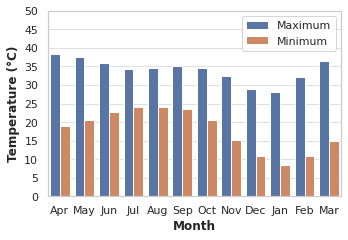

In [35]:
sns.set(rc={'figure.figsize':(5,3.5)})
sns.set_style("whitegrid")
ax_new = sns.barplot(x="Month", y="Value", hue = 'Variable' ,data=tidy, order=["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"])

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])
plt.grid(visible = True, axis = 'y',  alpha = 0.6)

ax_new.legend()

plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Temperature (\N{degree sign}C)", fontweight="semibold")
plt.tight_layout()
plt.savefig("faridpur_temperature.jpg",dpi = 500)
plt.show()